# Comparative Analysis of ARIMA, ANN and SVR (5)
###### Scenario 5 (SC5) contains hourly time-step input data representing the daily energy consumption of electric water boilers across 67 apartments.

### Introduction 
In this study, a comparative analysis of machine learning models was conducted for the prediction and forecasting of energy consumption by electric water boilers (EWBs), using a dataset from 67 apartments as a case study. The input data was subsequently categorised into five distinct scenarios, which were used as inputs to the ANN, SVR, and ARIMA models to evaluate their prediction and forecasting capabilities. These models were assessed using various performance metrics, as presented in the subsequent sections.

The core objective of this study is to conduct a baseline comparative analysis of energy prediction and forecasting models (ARIMA, SVR, and ANN) using time-series energy consumption data as endogenous inputs. The analysis focuses exclusively on time-dependent consumption patterns, constrained by data availability and privacy. The input data were categorised into five distinct scenarios, each reflecting different time-step resolutions, without incorporating external features or contextual variables, only the targeted energy input. This design enables a focused evaluation of each model’s performance based solely on time-series trends. Future work will aim to enhance this framework by integrating additional exogenous variables for improved prediction accuracy.


Scenario three is used throughout this report for implementation purposes, while the remaining scenarios are included in the code but remain commented out. They can be activated for additional estimations as needed. Figure 1 illustrates the methodology applied in this analysis.

<center>
<figure>
  <img src="method.jpg" width="70%" height="70%">
  <figcaption><i> Figure 1: Comparative analysis methodology </i></figcaption>
</figure>
</center>

#### Libraries Used for Model Development
- All Python libraries used for model development and comparison are presented below.

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib.colors as mcolors
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from matplotlib.pyplot import rc
from statsmodels.tsa.stattools import acovf
from statsmodels.graphics.tsaplots import plot_acf
import time

### Loading Data, Time Steps, and Structuring for Model Application and Visualisation ####

#### Data Normalization and Training Data
- The data was normalised and subsequently split into 80% for training and 20% for testing, for prediction and forecasting model implementation.

In [22]:
# Secanrio data 

flowload_data = pd.read_csv('electric_oneday.csv')  # daily consumption deframe data for 24houurs timestamp


total_time_len_day = 30 * 5   # prediction 

length_of_predict = 30  # future prediction (forecasting)

# data normalisation and training 
sample_data = flowload_data.iloc[:, -1] # 

datainf = flowload_data.iloc[:, -1].values  

datainf = datainf / np.max(datainf)

data_pass_to = [None, total_time_len_day, length_of_predict]

actual = datainf[:total_time_len_day + length_of_predict]


#### Data Description of Scenario 5
- Scenario 5 (SC5) consists of daily time-step input data representing the daily energy consumption of electric water boilers (EWBs) across 67 apartments. SC1 will be used for code implementation, while the other scenarios will remain commented out, as shown below.

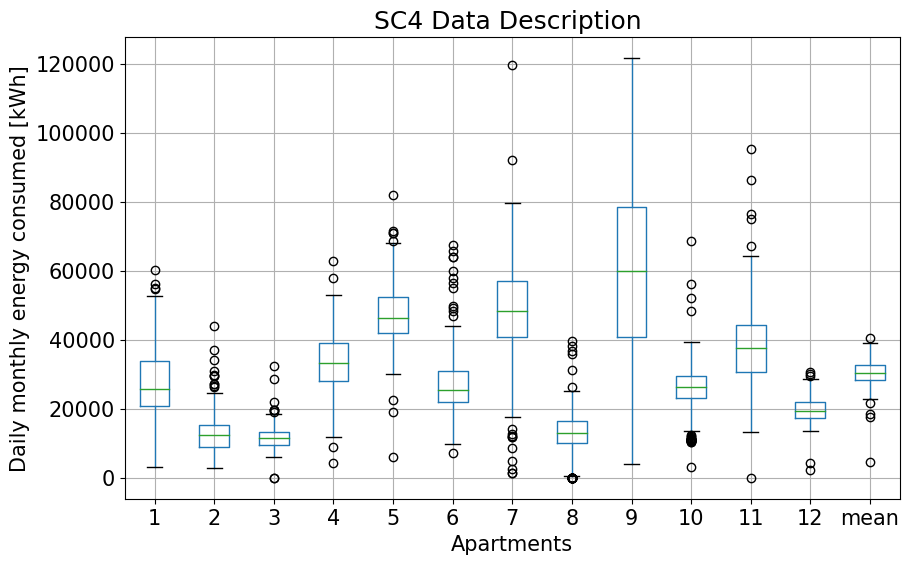

In [23]:
#  Data description visualisation plots
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_csv("electric_oneday.csv")


df_selected = df # training duration



# Directly rename the columns
df_selected.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'mean']
#df_selected.set_axis(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'mean'], axis='columns', inplace=True)


# visualisation 
rc('font', **{'size' : 15})
plt.figure(figsize=(10, 6)) 
df_selected.boxplot()  
plt.title('SC4 Data Description ')
#plt.xticks(rotation=45)  
plt.xlabel('Apartments')
plt.ylabel('Daily monthly energy consumed [kWh]')
plt.savefig('sc5_des.jpg')
plt.show()


#### ARIMA forecast and Prediction model development


#### Data Description of the Other Four Scenarios
- Scenario 2 (SC2) is presented in Figure 2, Scenario 3 (SC3) in Figure 3, Scenario 4 (SC4) in Figure 4, and Scenario 5 (SC5) in Figure 5, respectively. These figures illustrate the data description, input time steps, and the average energy consumption of electric water boilers (EWBs) across 67 apartments.

- Scenario 5 (SC5) is used for code implementation, while the codes for the other scenarios remain commented out. They can be activated as needed for further evaluation.



<center>
<figure>
  <img src="sc2_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 2: Scenario 2 (SC2) data description </i></figcaption>
</figure>
</center>


- Scenario 3 (SC3)

<center>
<figure>
  <img src="sc3_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 3: Scenario 3 (SC3) data description </i></figcaption>
</figure>
</center>


- Scenario 4 (SC4)

<center>
<figure>
  <img src="sc4_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 4: Scenario 4 (SC4) data description </i></figcaption>
</figure>
</center>


- Scenario 5 (SC5)

<center>
<figure>
  <img src="sc5_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 6: Scenario 5 (SC5) data description </i></figcaption>
</figure>
</center>


In [24]:
## ARIMA forecast and Prediction model development and analysis


#Computational time cost
start_time_arima_p = time.time()
start_time_arima_r = time.time()


## ARIMA model development
def arima_process(data, nhours, predict_len):
  
   
    kndata = data[:nhours]
    ukndata = data[nhours:nhours + predictlen]

    # Fitting the ARIMA model
    model = ARIMA(kndata, order=(3, 1, 0))
    fitted_model = model.fit()
    
    # prediction
    predict = fitted_model.predict(start=1, end=total_time_len_day)
    
    # Forecasting
    forecast = fitted_model.forecast(steps=predictlen)
    residuals = fitted_model.resid
    

    return kndata, ukndata, predict, forecast, residuals, fitted_model



nhours = total_time_len_day
predictlen = length_of_predict
kndata, ukndata, predict, forecast, residuals, fitted_model = arima_process(datainf, nhours, predictlen)


print(fitted_model.summary())



# computation time results
end_time_arima_p = time.time()
end_time_arima_r = time.time()
process_time_arima_p = end_time_arima_p - start_time_arima_p
process_time_arima_r = end_time_arima_r - start_time_arima_r
minute_arima_p = process_time_arima_p // 60 
minute_arima_r = process_time_arima_r // 60
second_arima_p = process_time_arima_p % 60 
second_arima_r = process_time_arima_r % 60 


# Computation time visualisation 
# prediction
print('Time Spent for arima_p: ', round(minute_arima_p), 'minutes', round(second_arima_p,3), 'seconds')

# forecasting time spent
print('Time Spent for arima_r: ', round(minute_arima_r), 'minutes', round(second_arima_r,3), 'seconds')


# Performance Metrics Evaluation 
# Prediction
r2_p = r2_score(kndata, predict)
rmse_p = np.sqrt(mean_squared_error(kndata, predict))
arima_mae_p = mean_absolute_error(kndata, predict)
mse_p = mean_squared_error(kndata, predict)


# forecasting
r2_r = r2_score(ukndata, forecast)
rmse_r = np.sqrt(mean_squared_error(ukndata, forecast))
arima_mae_r = mean_absolute_error(ukndata, forecast)
mse_r = mean_squared_error(ukndata, forecast)


# Print out metric results
# Prediction
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", arima_mae_p, "MSE:", mse_p)


# forecasting
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", arima_mae_r, "MSE:", mse_r)



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  150
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 152.496
Date:                Tue, 25 Mar 2025   AIC                           -296.992
Time:                        20:48:07   BIC                           -284.976
Sample:                             0   HQIC                          -292.110
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3385      0.095     -3.554      0.000      -0.525      -0.152
ar.L2         -0.2606      0.100     -2.600      0.009      -0.457      -0.064
ar.L3         -0.1463      0.088     -1.672      0.0

#### SVR forecasting and prediction model development

In [25]:
#svr model development

### Kernel function of SVR
start_time_svr_p = time.time()
start_time_svr_r = time.time()

def funck(x, y, kernel_type):
    # Gaussian Kernel
    if kernel_type == 'g':
        sigma = 0.0005   
        return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))
    return 0

#svr model development
def svr_process(datainf, data_pass_to, past_predict_len):
    nhour1 = data_pass_to[1]
    predictlen = data_pass_to[2]
    data = datainf
    datain = []

    for kl in range(nhour1 + predictlen):
        datain.append(data[kl:kl + 2])

    datain = np.array(datain) 
    
    datax = datain[:, :-1]
    datay = datain[:, -1]
    totlpt = len(datain)
    alpha = np.zeros(totlpt)
    norm1 = 10e2
    errortol = 0.2
    itercnt = 0
    maxiter = 10e2
    eps = 0.1

    while norm1 > errortol and itercnt < maxiter:
        alpha_old = alpha.copy()
        alpha_ = alpha.copy()

        for indxd in range(totlpt):
            gx = np.array([funck(datax[x], datax[indxd], 'g') for x in range(len(datax))])
            alpha[indxd] = alpha[indxd] + datay[indxd] - eps * np.sign(alpha[indxd]) - np.dot(alpha, gx)

            if alpha_[indxd] * alpha[indxd] < 0:
                alpha[indxd] = 0

        norm1 = np.linalg.norm(alpha_old - alpha)
        itercnt += 1

  

    outdata = np.array([alpha[indx2] * np.array([funck(datax[x], datax[indx2], 'g') for x in range(len(datax))]) for indx2 in range(totlpt)])
    outdataf = np.sum(outdata, axis=0)

    # Handle outdataf for non-array cases
    if not isinstance(outdataf, np.ndarray):
        outdataf = np.array([outdataf])

    # Past predictions
    past_predictions = outdataf[past_predict_len:nhour1] if past_predict_len < nhour1 else np.array([])
   

    # Future predictions
    resout = outdataf[nhour1:nhour1 + predictlen] if len(outdataf) > nhour1 else np.array([])

    kndata = datay[:nhour1]
    ukndata = datay[nhour1:nhour1 + predictlen]
    SVR_MSE = np.mean((ukndata - resout) ** 2) if resout.size > 0 else np.nan
    

    return kndata, ukndata, past_predictions, resout, SVR_MSE


# parameter predictions 
past_predict_len = 0 
kndata, ukndata, past_predictions, resout, svr_mse = svr_process(datainf, data_pass_to, past_predict_len)
end_time_svr_p = time.time()
end_time_svr_r = time.time()
process_time_svr_p = end_time_svr_p - start_time_svr_p
process_time_svr_r = end_time_svr_r - start_time_svr_r
minute_svr_p = process_time_svr_p // 60 
minute_svr_r = process_time_svr_r // 60
second_svr_p = process_time_svr_p % 60 
second_svr_r = process_time_svr_r % 60 

# Computation time visualisation 
# prediction
print('Time Spent for svr_p: ', round(minute_svr_p), 'minutes', round(second_svr_p,3), 'seconds')

# forecasting time spent
print('Time Spent for svr_r: ', round(minute_svr_r), 'minutes', round(second_svr_r,3), 'seconds')


# Performance Metrics Evaluation 
# Prediction
r2_p = r2_score(kndata, past_predictions)
rmse_p = np.sqrt(mean_squared_error(kndata, past_predictions))
svr_mae_p = mean_absolute_error(kndata, past_predictions)
mse_p = mean_squared_error(kndata, past_predictions)

## forecasting 
r2_r = r2_score(ukndata, resout)
rmse_r = np.sqrt(mean_squared_error(ukndata, resout))
svr_mae_r = mean_absolute_error(ukndata, resout)
mse_r = mean_squared_error(ukndata, resout)


# Print out metric results
# Prediction
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", svr_mae_p, "MSE:", mse_p)

# forecasting
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", svr_mae_r, "MSE:", mse_r)


Time Spent for svr_p:  2 minutes 42.403 seconds
Time Spent for svr_r:  2 minutes 42.403 seconds
prediction - R2 Score: -0.31138018517873034 RMSE: 0.09708870753041259 MAE: 0.09304501952089828 MSE: 0.009426217129925994
forecast - R2 Score: -1.341832459448359 RMSE: 0.09754321023195095 MAE: 0.09681559456073138 MSE: 0.009514677862354581


####  ANN Model Development

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.5141 - mse: 0.5141 - val_loss: 0.3724 - val_mse: 0.3724
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3668 - mse: 0.3668 - val_loss: 0.2563 - val_mse: 0.2563
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2550 - mse: 0.2550 - val_loss: 0.1574 - val_mse: 0.1574
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 0.0798 - val_mse: 0.0798
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0748 - mse: 0.0748 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mse: 0.0082 

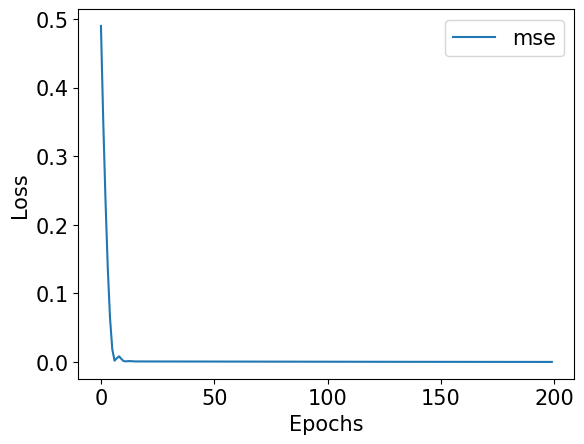

Time Spent for ann_p:  0 minutes 13.534 seconds
Time Spent for ann_r:  0 minutes 13.534 seconds
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Training Data - R2 Score: 0.9954080758402455 RMSE: 0.005944180476438984 MAE: 0.00463753828531782 MSE: 3.5333281536478384e-05
Test Data - R2 Score: 0.9938753221430673 RMSE: 0.00928287620199118 MAE: 0.0050862249887101 MSE: 8.61717905814942e-05


In [26]:

split_size = int(0.8 * len(flowload_data))


train_data = datainf[:split_size]
test_data = datainf[split_size:]


#Computational time cost 
start_time_ann_p = time.time()
start_time_ann_r = time.time()


def ann_model(): 
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),  
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.Dense(1, activation='sigmoid') # 
        tf.keras.layers.Dense(1, activation='linear')
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mse']) 
    
    history = model.fit(
        train_data, train_data,  
        epochs=200,  
        validation_data=(test_data, test_data),  # Validation set
        verbose=1
    )
    
    return model, history

    

model, history = ann_model() 


pred = model.predict(datainf)
df = pd.DataFrame(history.history)
plt.plot(list(range(len(df.mse))), df.mse, label='mse')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



#Computational cost end time
end_time_ann_p = time.time()
end_time_ann_r = time.time()
process_time_ann_p = end_time_ann_p - start_time_ann_p
process_time_ann_r = end_time_ann_r - start_time_ann_r
minute_ann_p = process_time_ann_p // 60 
minute_ann_r = process_time_ann_r // 60
second_ann_p = process_time_ann_p % 60 
second_ann_r = process_time_ann_r % 60 

# print processing time ANN prediction
print('Time Spent for ann_p: ', round(minute_ann_p), 'minutes', round(second_ann_p,3), 'seconds')

# forecast
print('Time Spent for ann_r: ', round(minute_ann_r), 'minutes', round(second_ann_r,3), 'seconds')


# Performance Metrics Evaluation for Prediction
train_predictions = model.predict(train_data).flatten()
test_predictions = model.predict(test_data).flatten()

# predictions metrics 
r2_train = r2_score(train_data, train_predictions)
rmse_train = np.sqrt(mean_squared_error(train_data, train_predictions))
ann_mae_train = mean_absolute_error(train_data, train_predictions)
mse_train = mean_squared_error(train_data, train_predictions)

# forecast metrics 
r2_test = r2_score(test_data, test_predictions)
rmse_test = np.sqrt(mean_squared_error(test_data, test_predictions))
ann_mae_test = mean_absolute_error(test_data, test_predictions)
mse_test = mean_squared_error(test_data, test_predictions)


# Print prediction metrics
print("Training Data - R2 Score:", r2_train, "RMSE:", rmse_train, "MAE:", ann_mae_train, "MSE:", mse_train)

# forecasting 
print("Test Data - R2 Score:", r2_test, "RMSE:", rmse_test,"MAE:", ann_mae_test, "MSE:", mse_test)



#### ARIMA Plots

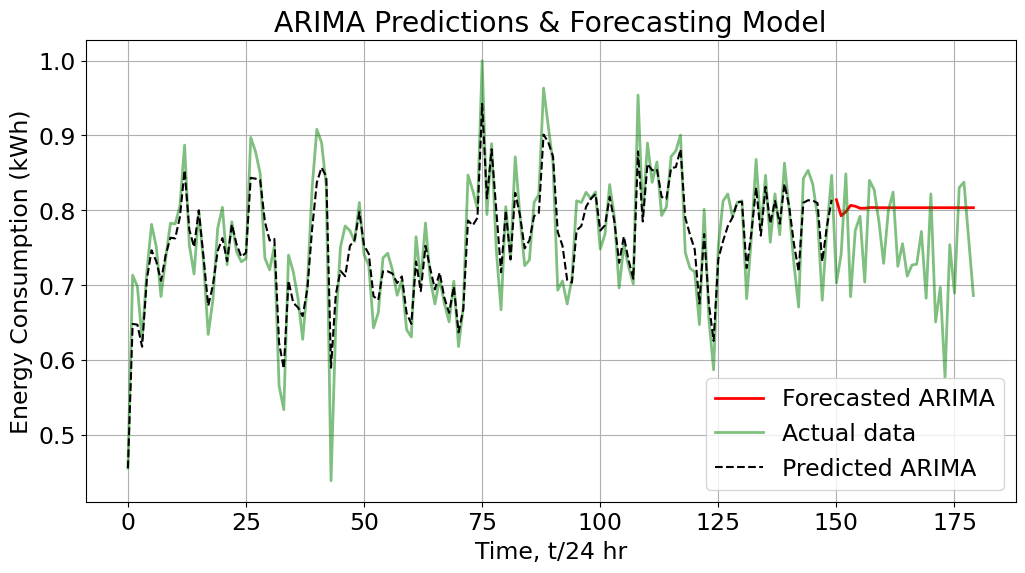

In [7]:
# Plotting All Results
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day,total_time_len_day + length_of_predict)), forecast, 'r', label='Forecasted ARIMA', linewidth=2)
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.5, linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'black', label='Predicted ARIMA', linestyle='--')
plt.title('ARIMA Predictions & Forecasting Model')
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
#plt.savefig('sc5_arima.jpg')
plt.show()

#### SVR plots

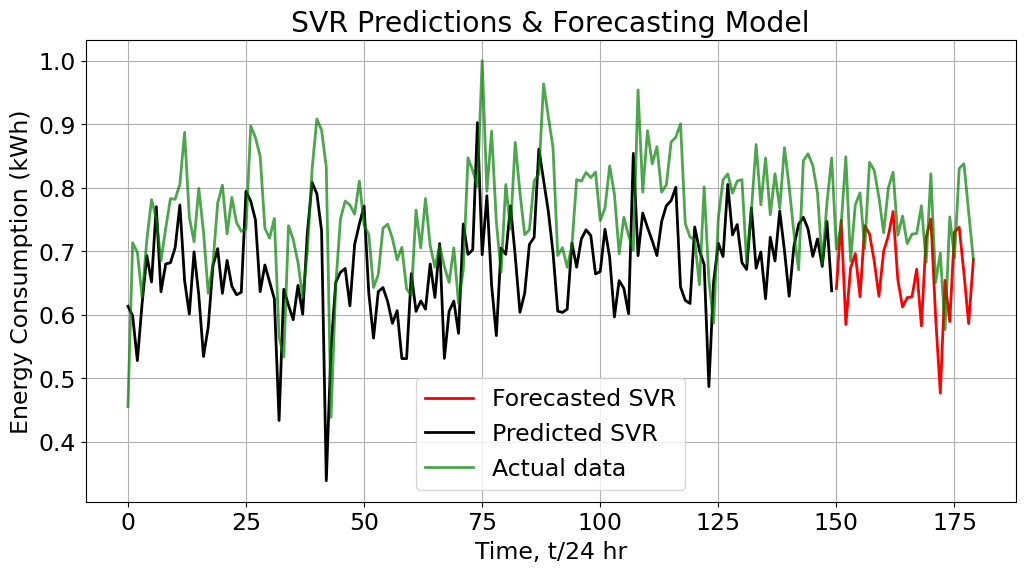

In [8]:
# Plotting
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day, total_time_len_day + length_of_predict)), resout, 'r', label='Forecasted SVR', linewidth=2)
plt.plot(list(range(total_time_len_day)), past_predictions, 'black', label='Predicted SVR', linewidth=2)
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.title('SVR Predictions & Forecasting Model')
plt.legend()
plt.grid(True)
#plt.savefig('sc5_svr.jpg')
plt.show()

#### ANN Model

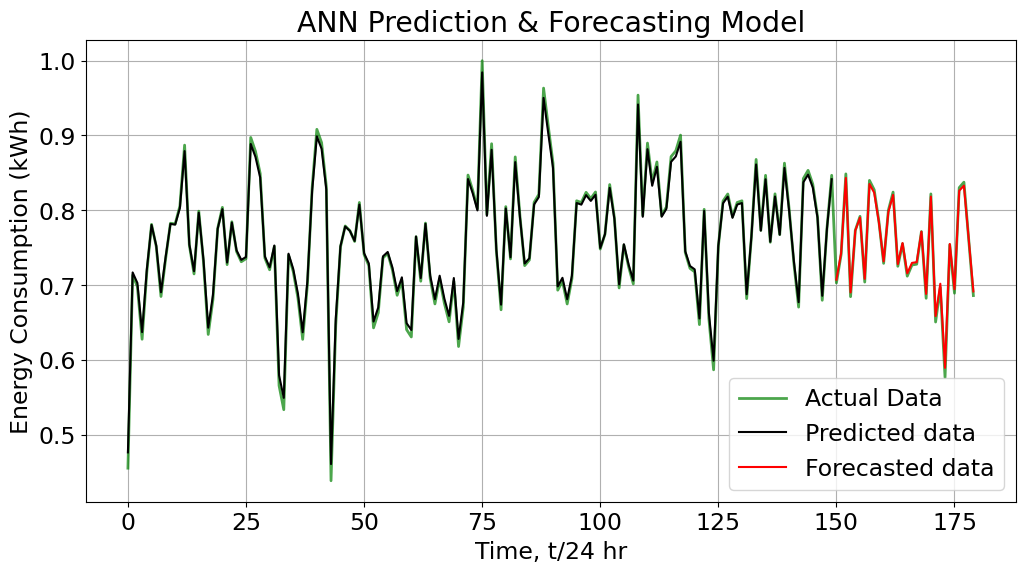

In [27]:
# Plotting Trained, Prediction & Forecast
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
#plt.plot(range(0, total_time_len_day), datainf[:total_time_len_day], 'g', label='Test data')
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual Data', alpha=0.7, linewidth=2)
plt.plot(range(0, total_time_len_day), pred[:total_time_len_day], 'black', linestyle='-', label='Predicted data')
plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'r', label='Forecasted data')
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.title('ANN Prediction & Forecasting Model')
plt.legend()
plt.grid(True)
#plt.savefig('sc5_ann.jpg')
plt.show()

#### Comparison of Prediction and Forecasting Plots of ARIMA, ANN, and SVR Models   ####

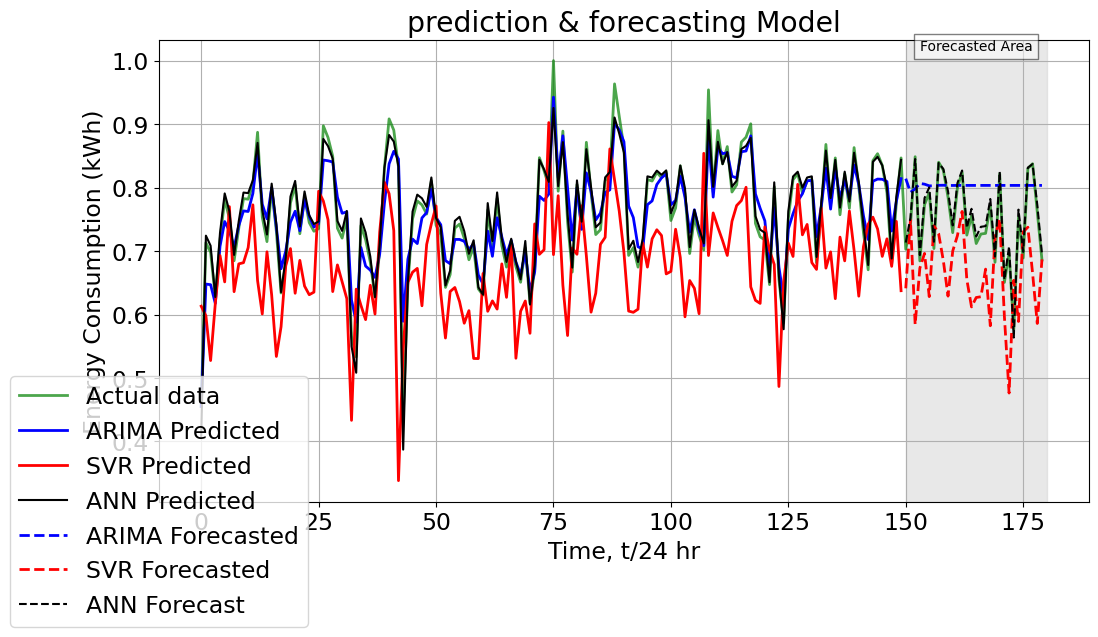

In [13]:
# Plotting All Results
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)
# prediction plots
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'blue', label='ARIMA Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), past_predictions, 'r', label='SVR Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), pred[:total_time_len_day], 'black', linestyle='-', label='ANN Predicted')
#forecasting plots
plt.plot(list(range(total_time_len_day,total_time_len_day + length_of_predict)), forecast, 'blue', linestyle='--', label='ARIMA Forecasted', linewidth=2)
plt.plot(list(range(total_time_len_day, total_time_len_day + length_of_predict)), resout, 'r', linestyle='--', label='SVR Forecasted', linewidth=2)
plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'black', linestyle='--', label='ANN Forecast')
plt.axvspan(total_time_len_day, total_time_len_day + length_of_predict, color='lightgray', alpha=0.5)
x_position = total_time_len_day + (length_of_predict / 2)  
y_position = plt.ylim()[1] 
plt.text(x_position, y_position, 'Forecasted Area', ha='center', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.title('prediction & forecasting Model')
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(loc='center', bbox_to_anchor = (0, 0))
plt.grid(True)
#plt.savefig('sc5_pf.jpg')
plt.show()
